In [1]:
## mporting libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading the dataset into the variable "customer_df"
file_path = "files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv"
customer_df = pd.read_csv(file_path)
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
## What should we do with the customer_id column?
## We should set 'cusotmer_id' as index.
customer_df.set_index('Customer', inplace=True)
customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
print(customer_df.columns)

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [5]:
## Let's get some info of the data
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null

In [6]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
## Load the continuous and discrete variables into numericals_df and categorical_df variables.

numerical_df = customer_df.select_dtypes(include= ['float64', 'int64'])
categorical_df = customer_df.select_dtypes(include=['object'])

print(numerical_df)
print(categorical_df)




          Customer Lifetime Value  Income  Monthly Premium Auto  \
Customer                                                          
BU79786               2763.519279   56274                    69   
QZ44356               6979.535903       0                    94   
AI49188              12887.431650   48767                   108   
WW63253               7645.861827       0                   106   
HB64268               2813.692575   43836                    73   
...                           ...     ...                   ...   
LA72316              23405.987980   71941                    73   
PK87824               3096.511217   21604                    79   
TD14365               8163.890428       0                    85   
UP19263               7524.442436   21941                    96   
Y167826               2611.836866       0                    77   

          Months Since Last Claim  Months Since Policy Inception  \
Customer                                                    

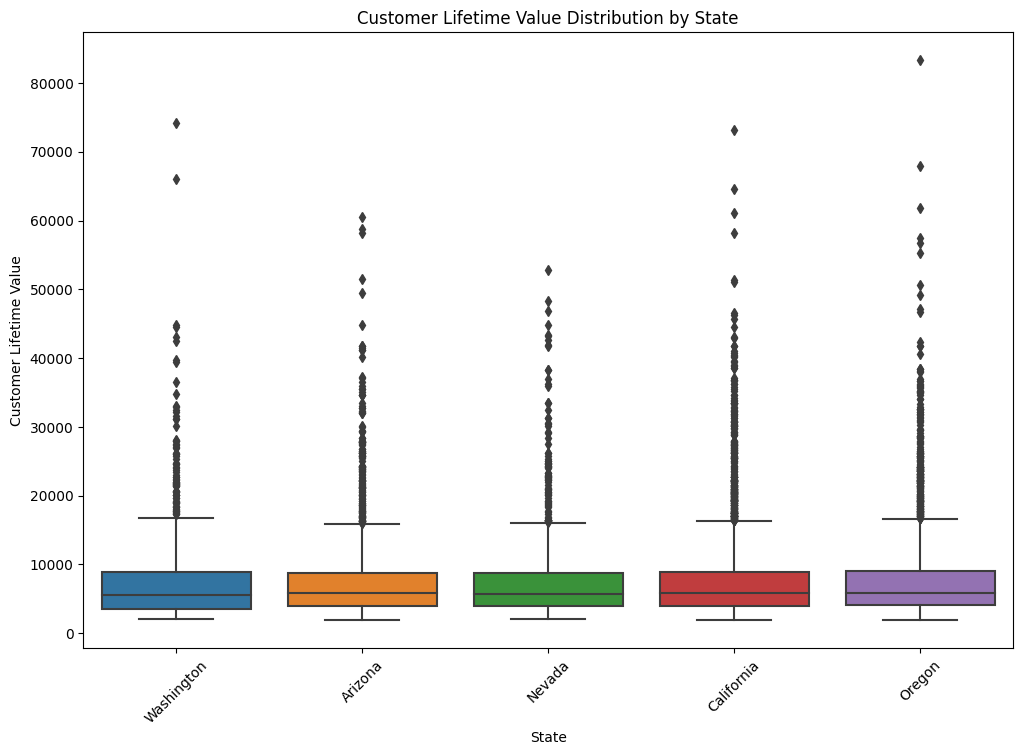

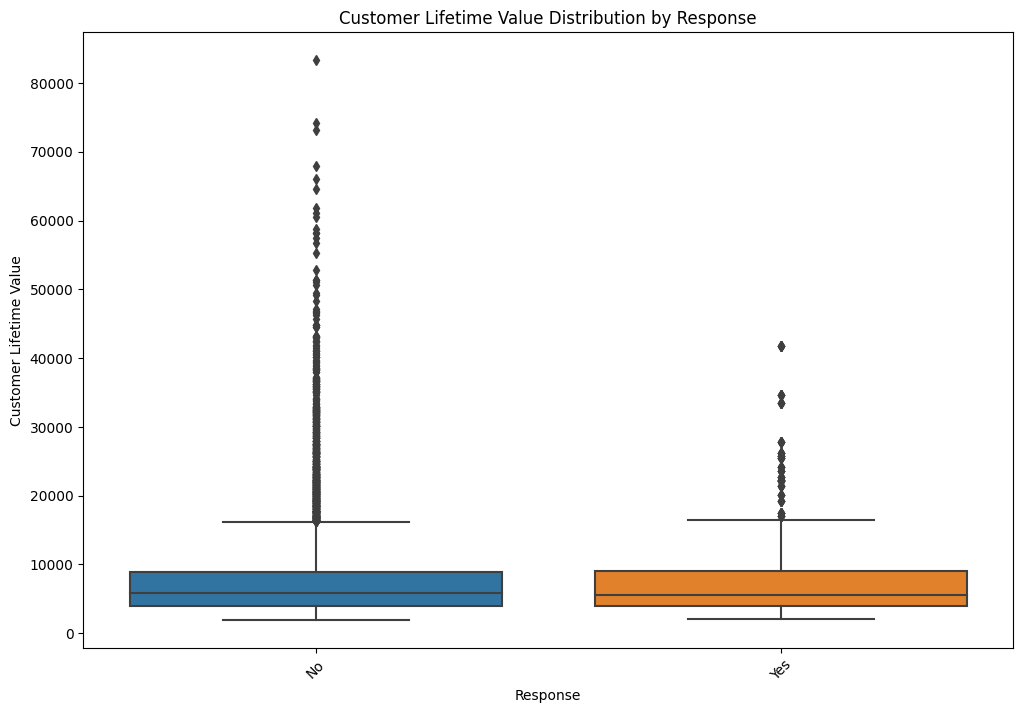

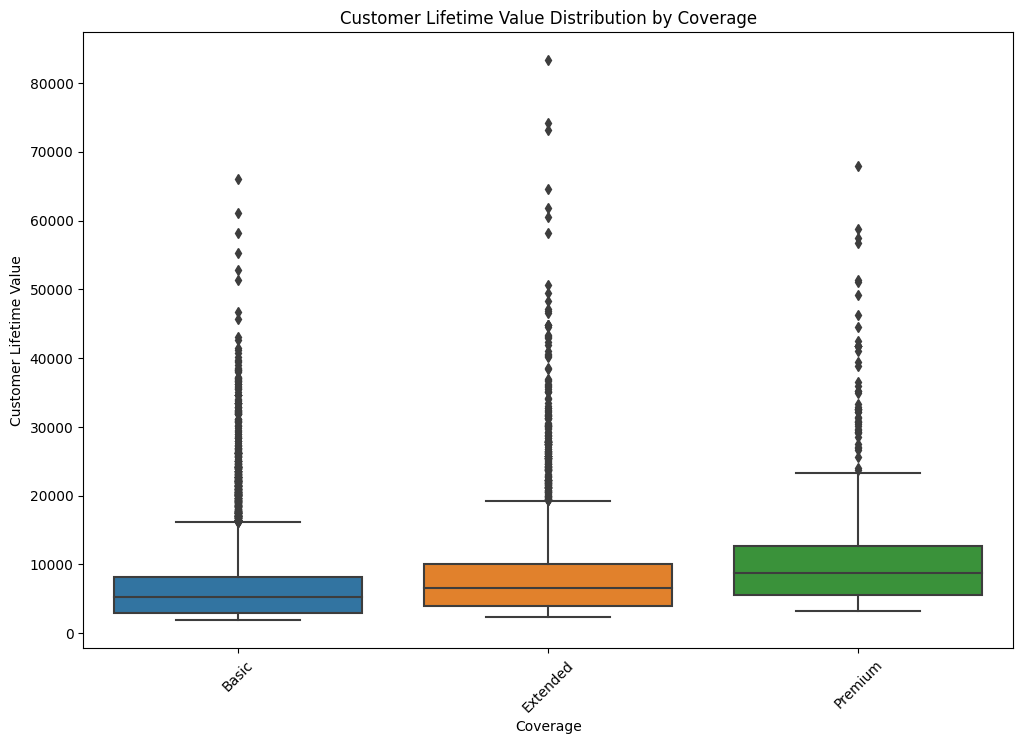

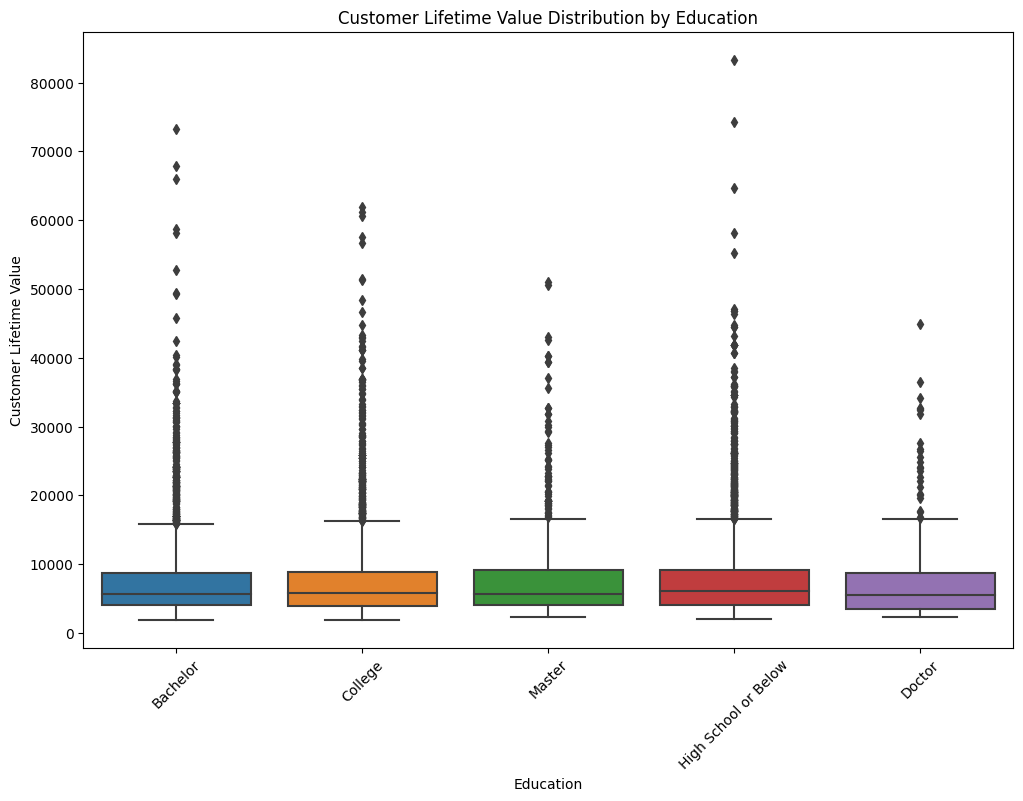

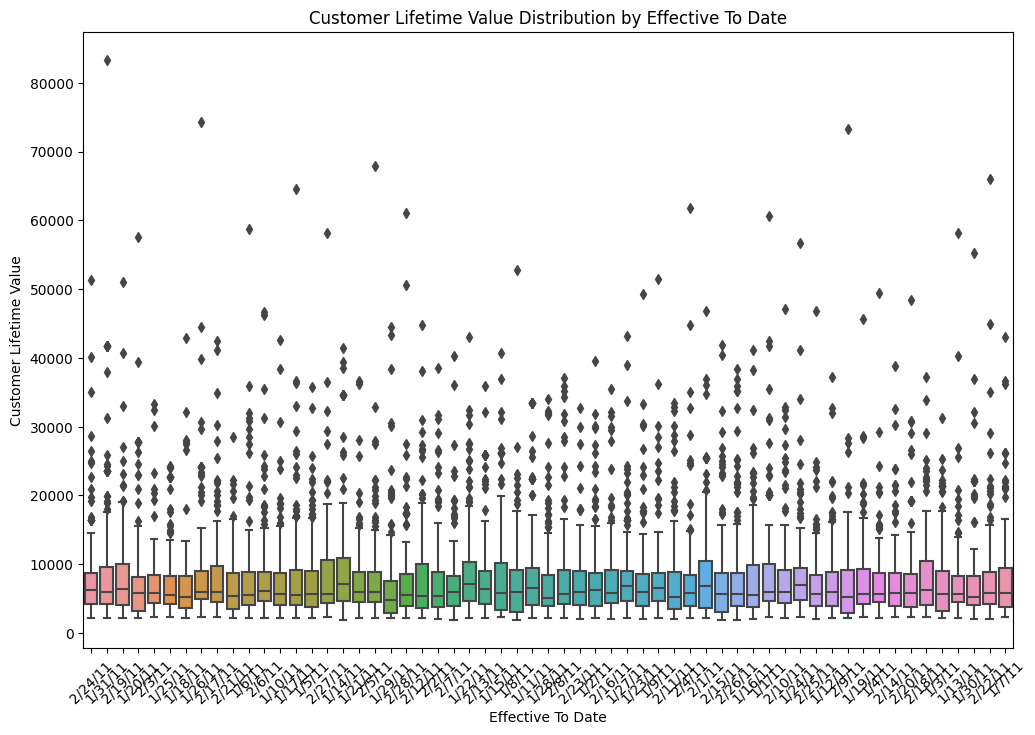

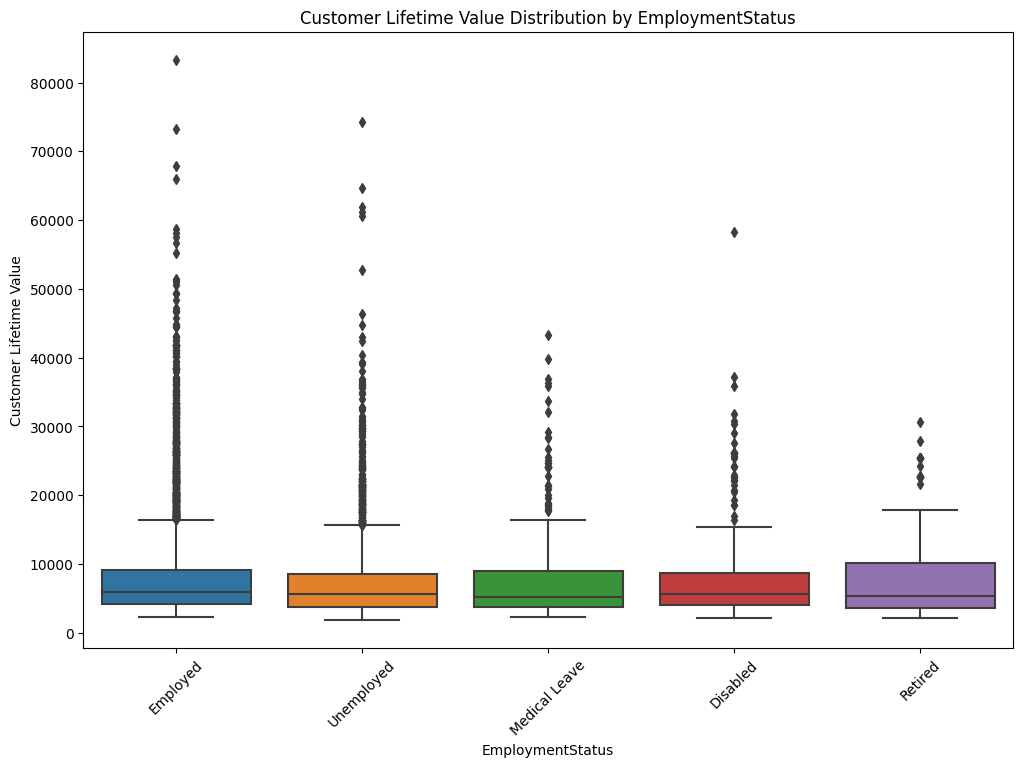

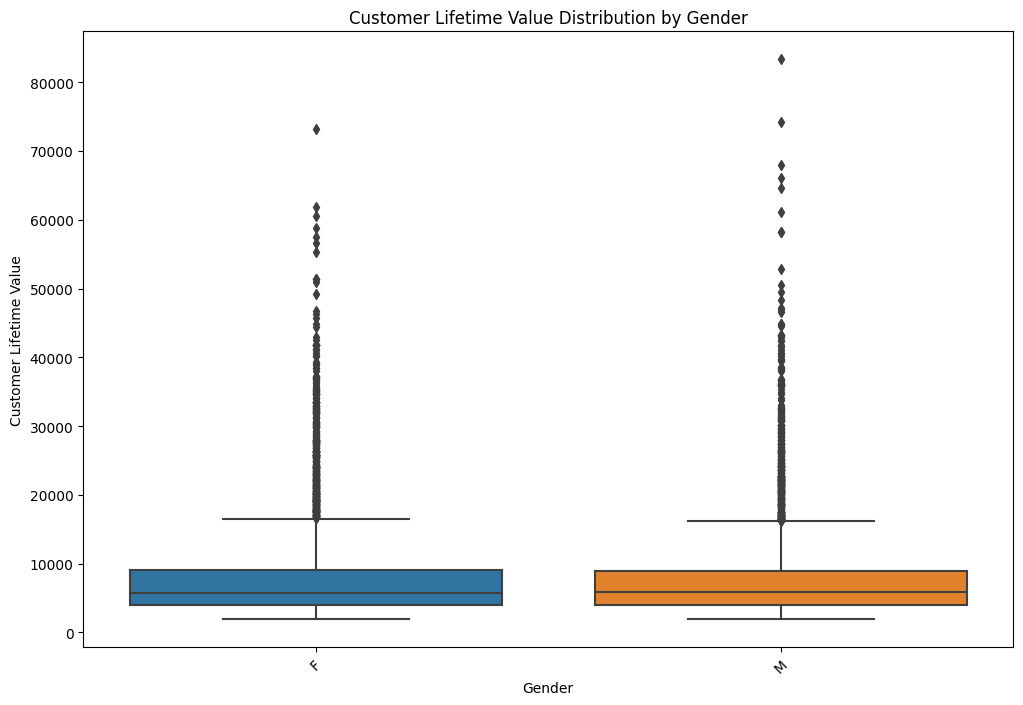

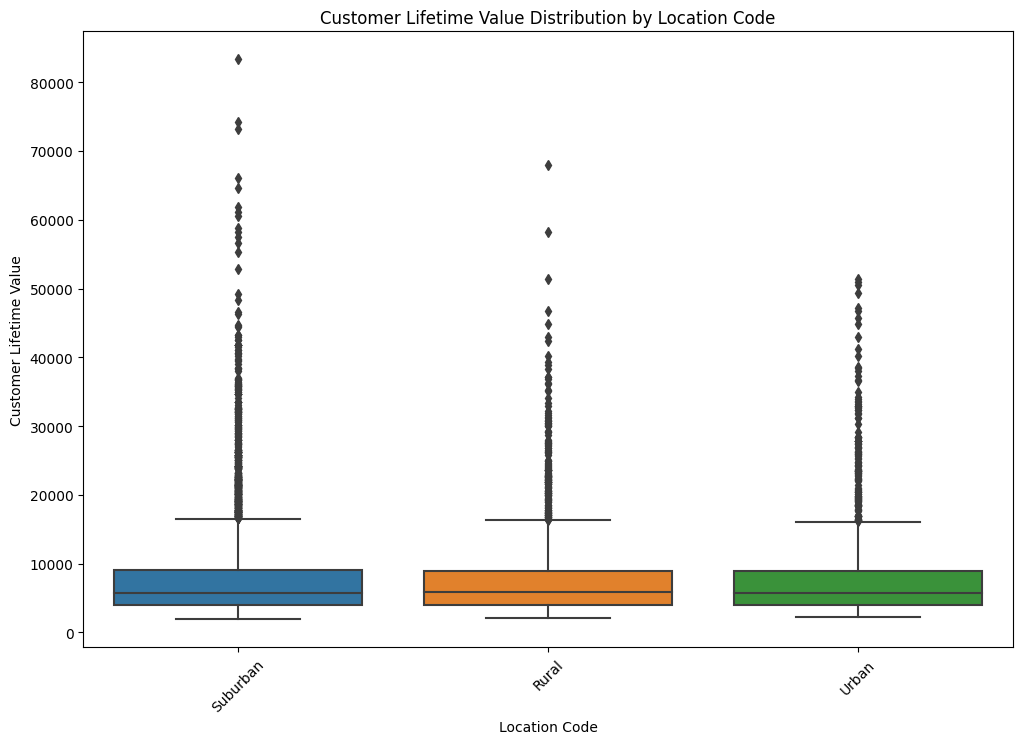

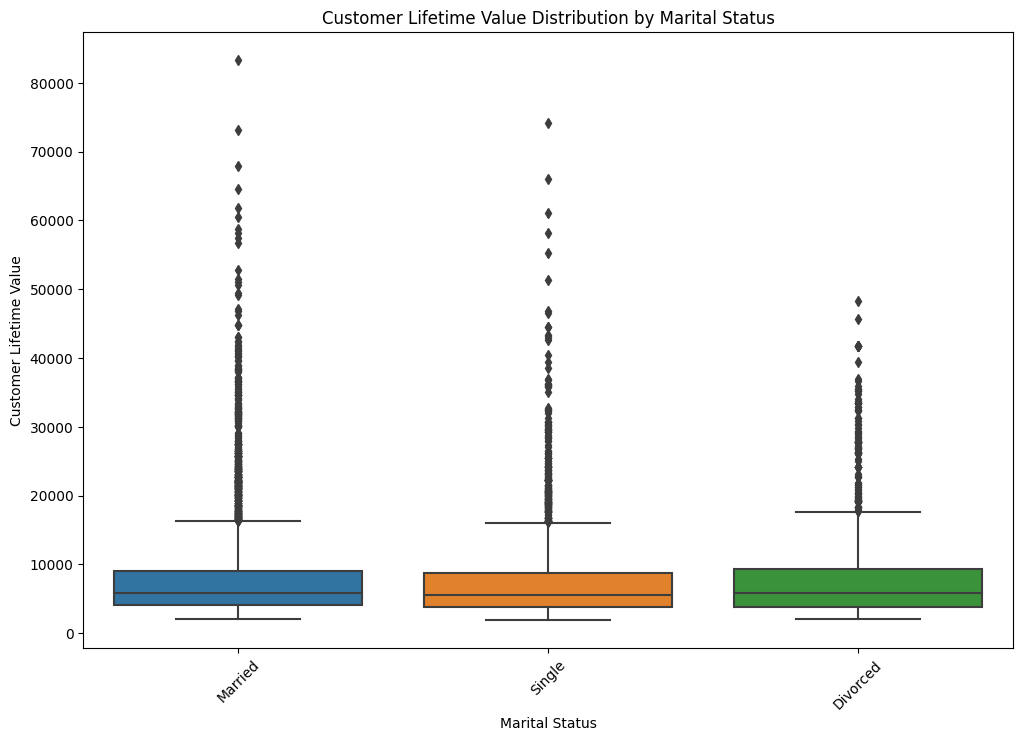

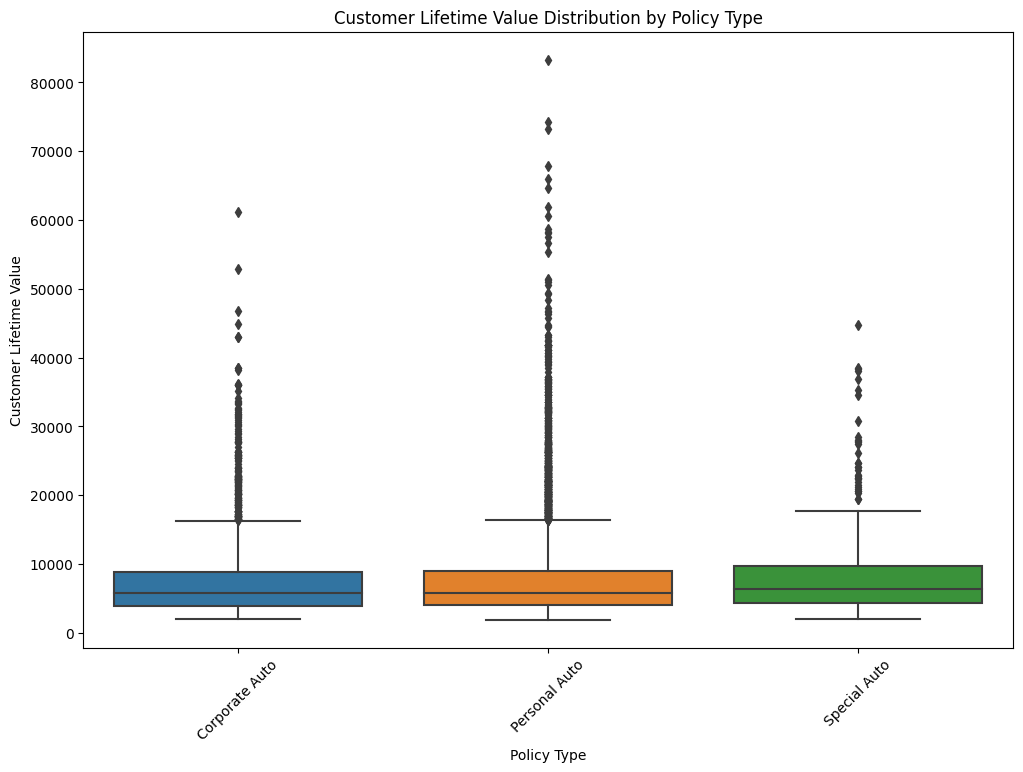

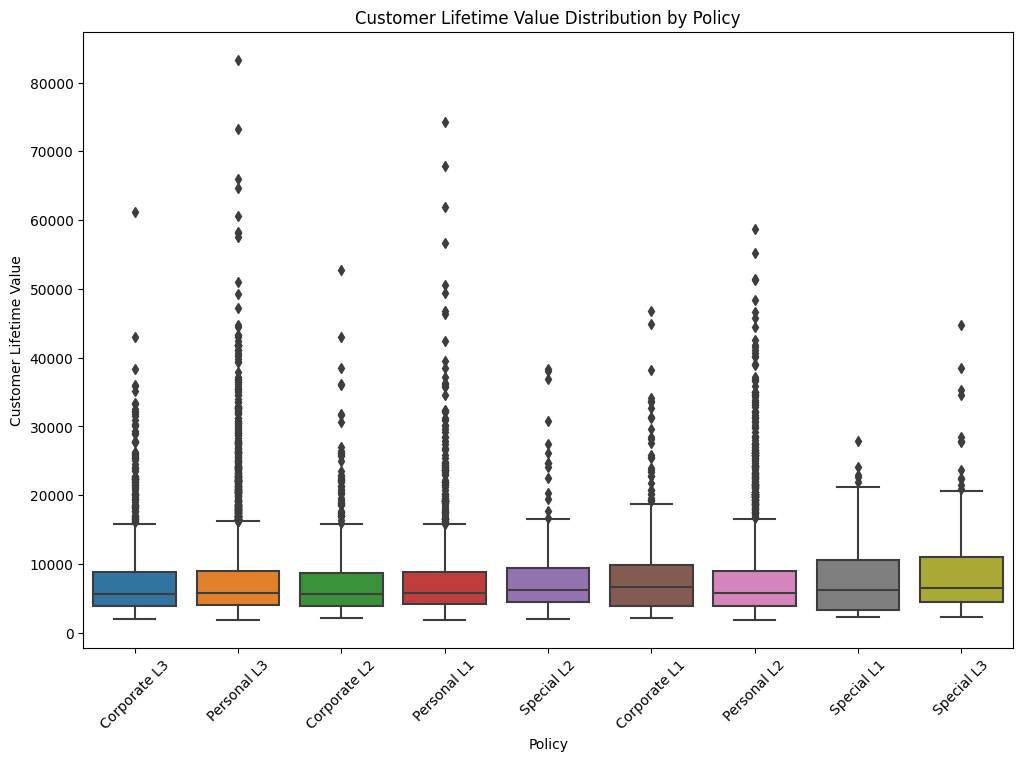

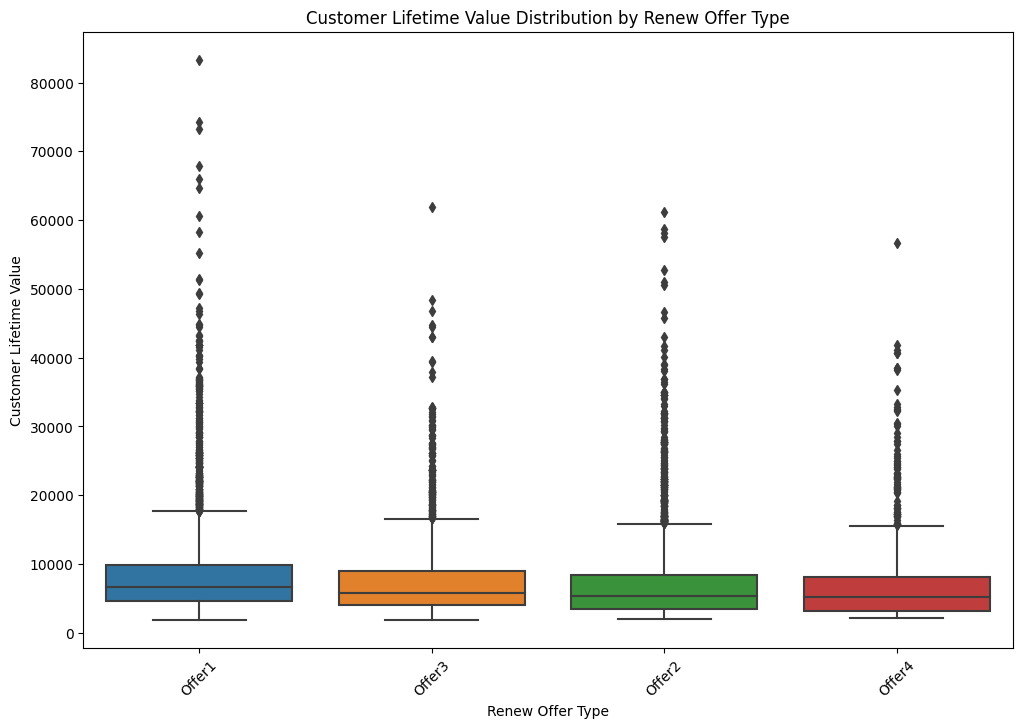

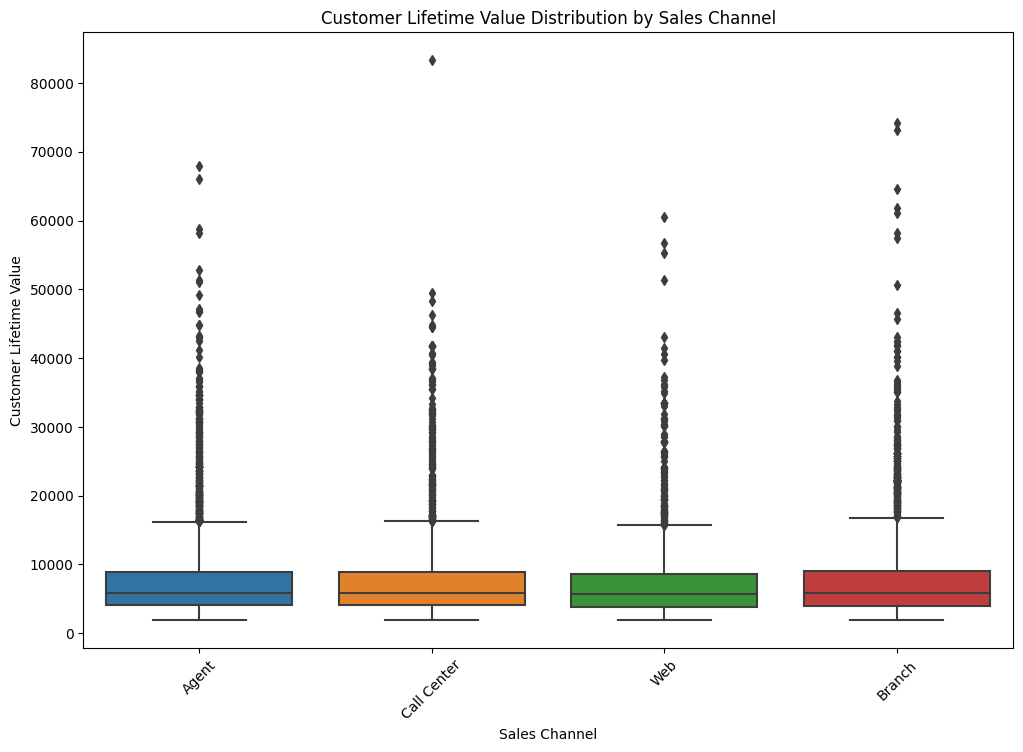

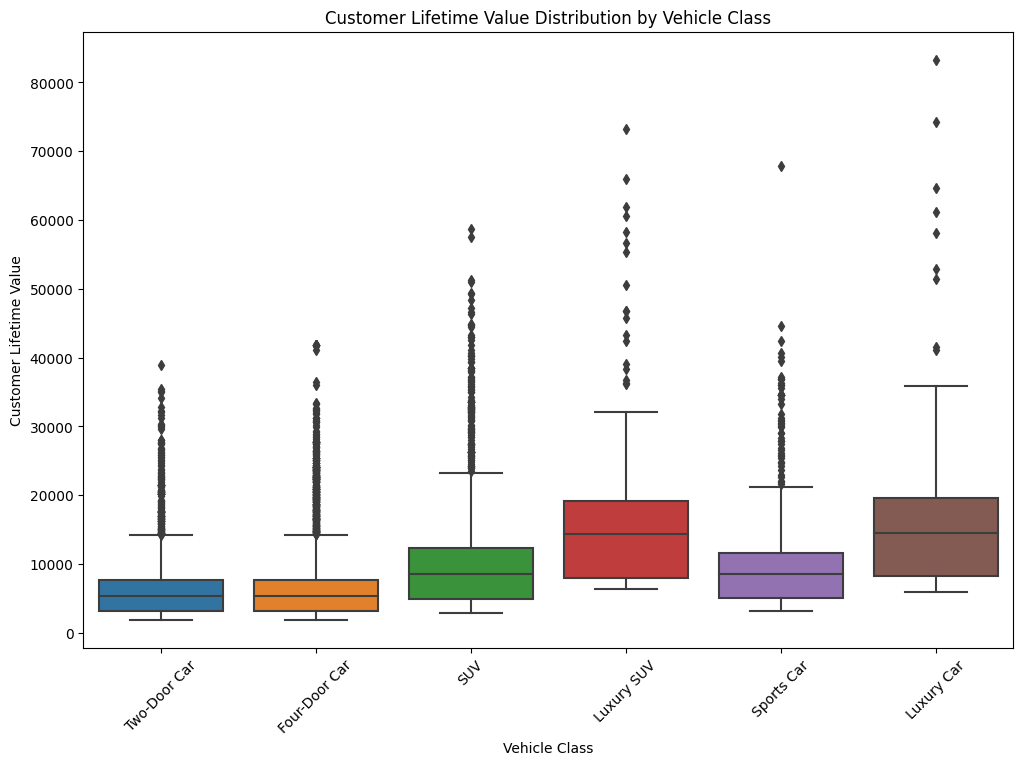

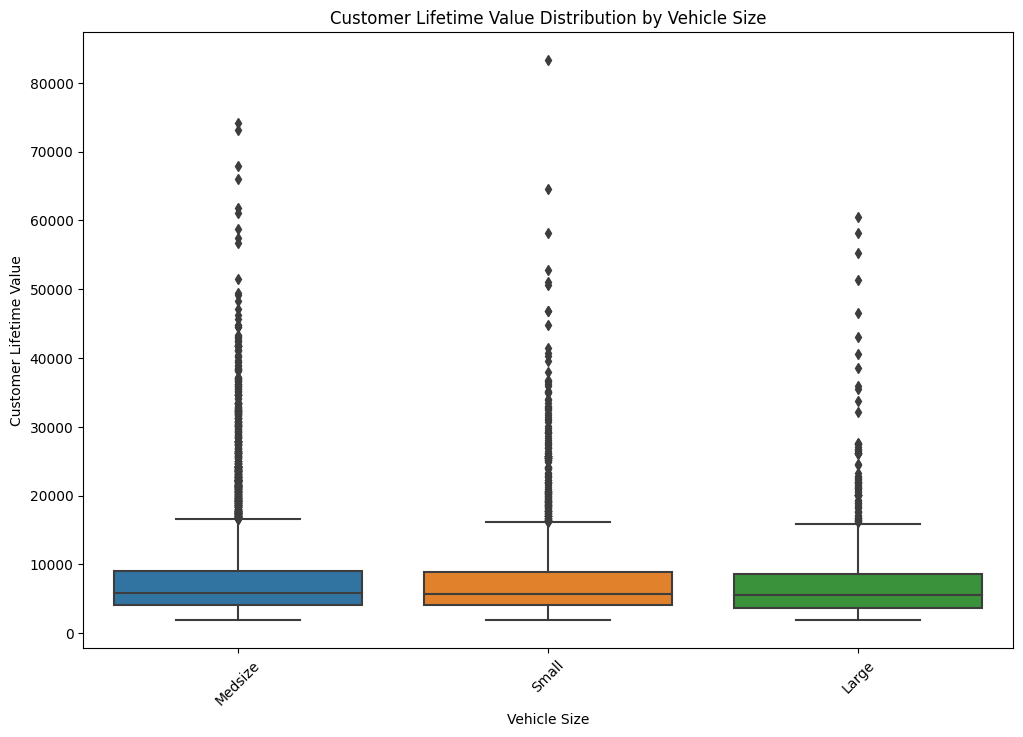

In [8]:
## Plot every categorical variable. What can you see in the plots?

target_variable = "Customer Lifetime Value"
categorical_columns = customer_df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    if column in customer_df.columns:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x=column, y=target_variable, data=customer_df)
        plt.title(f'{target_variable} Distribution by {column}')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column '{column}' not found in DataFrame.")



In [9]:
## For the categorical data, check if there is any data cleaning that need to perform.

def get_categorical_value_counts(customer_df):
    categorical_columns = customer_df.select_dtypes(include=['object']).columns
    category_value_counts = {column: customer_df[column].value_counts() for column in categorical_columns}
    return category_value_counts

ordered_category_value_counts = get_categorical_value_counts(customer_df)

for column, counts in ordered_category_value_counts.items():
    print(f"Column: {column}")
    print(counts)
    print()


Column: State
State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

Column: Response
Response
No     7826
Yes    1308
Name: count, dtype: int64

Column: Coverage
Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

Column: Education
Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

Column: Effective To Date
Effective To Date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    15

### It seems like there are no obvious data cleaning issues. However, there are a few aspects we might consider:

1. **Date Format**: The "Effective To Date" column contains dates in the format 'mm/dd/yy'. Depending on our analysis, we might convert this column to a datetime format for easier manipulation and analysis.

2. **Missing Values**: There are no missing values. In my exoerience in the bootcamp it's essential to check for missing values in each column and decide on an appropriate strategy for handling them, such as imputation for example.

3. **Inconsistent Categorical Values**: While not evident from the our value counts function, it's always good to check for any inconsistencies or misspellings in categorical columns.

4. **Outliers**: There are no ouliers, but it's worth checking for any extreme values, especially in numerical columns, which might skew our analysis.

5. **Data Types**: It's always good to check data types of each column are appropriate for the information they contain. (E.g. categorical columns should be of type 'object', and numerical columns should be of type 'int64' or 'float64').


In [18]:
## 1. Open the categoricals variable we created before.

categoricals = customer_df.select_dtypes(object)
categoricals.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [19]:
categoricals.describe()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


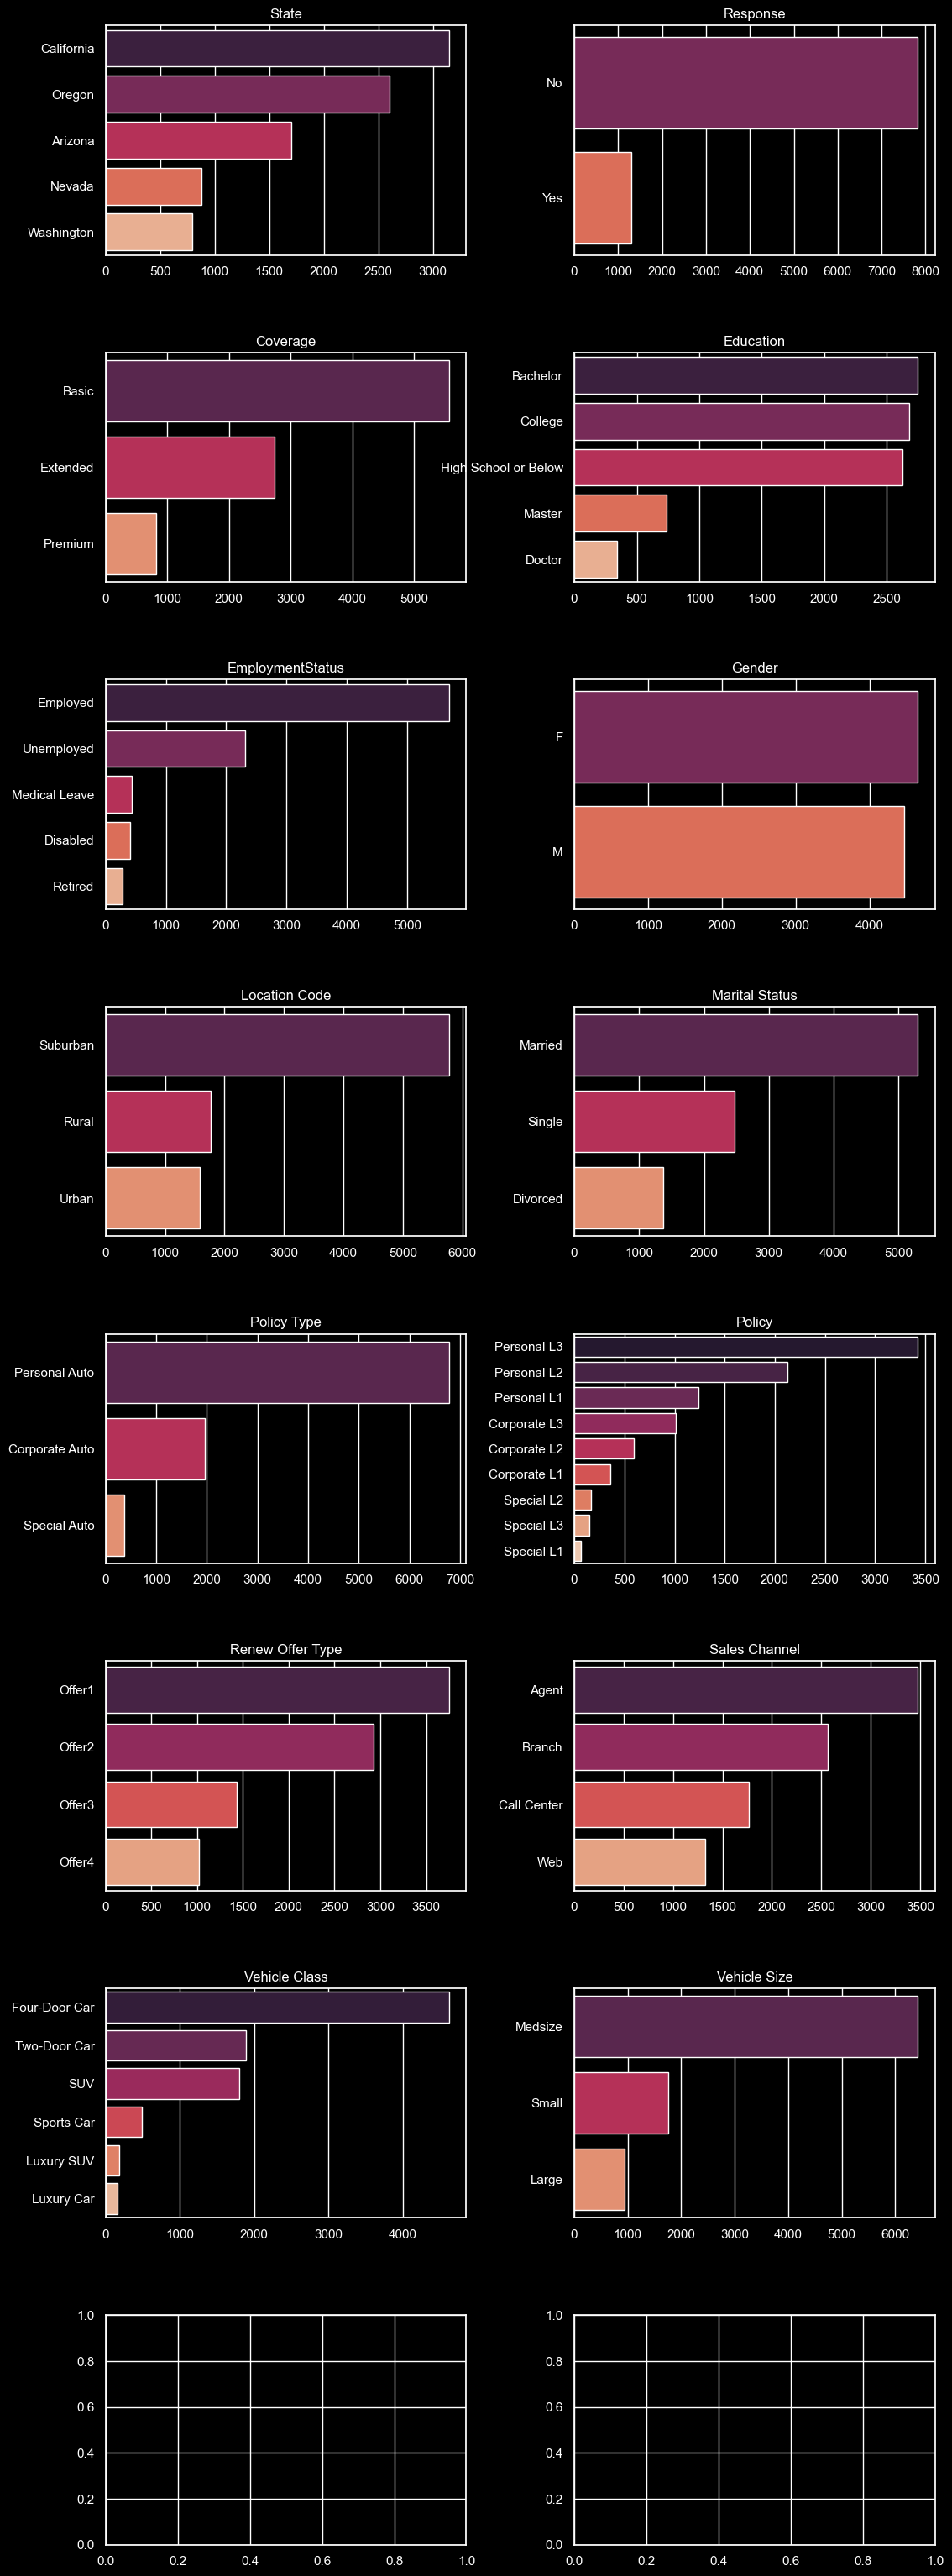

In [32]:
## 2. Plot all the categorical variables with the proper plot. We can use count plots for each categorical variable.

sns.set(style="darkgrid")
plt.style.use("dark_background")

# 'Effective To Date' might be better visualized separately due to its nature as a date variable, also we would have to change to DateTime format.
categoricals_plotted = categoricals.columns.drop(["Effective To Date"])

n = len(categoricals_plotted)
ncolumns= 2
nrows = n // ncolumns + (n + ncolumns > 0)

fig, axes = plt.subplots(nrows=nrows, ncols=ncolumns, figsize=(12, nrows * 4))
fig.tight_layout(pad=5.0)

for i, var in enumerate(categoricals_plotted):
    row = i // ncolumns
    col = i % ncolumns
    ax = axes[row, col] if nrows > 1 else axes[col]
    sns.countplot(y=var, data=categoricals, ax=ax, palette="rocket", order=categoricals[var].value_counts().index)
    ax.set_title(var, fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

if n % ncolumns != 0:
    for idx in range(n, nrows * ncolumns):
        axes.flat[idx].set_visible(False)

plt.show()


In [34]:
# There might be some columns that seem to be redundant, check their values to be sure. Relationship between 'Policy Type' and 'Policy' to understand their redundancy.
# We'll examine how 'Policy' values are distributed within each 'Policy Type'.

policy_crossed= pd.crosstab(index=categoricals['Policy Type'], columns=categoricals['Policy'])

policy_crossed

Policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
Policy Type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1240,2122,3426,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


#### Insights :

'Policy' is indeed a more detailed categorization within each 'Policy Type'. There's no overlap between the types of policies across different policy types, meaning each 'Policy Type' has unique 'Policy' subcategories. Keeping both variables can be useful for analyses that require different levels of granularity.

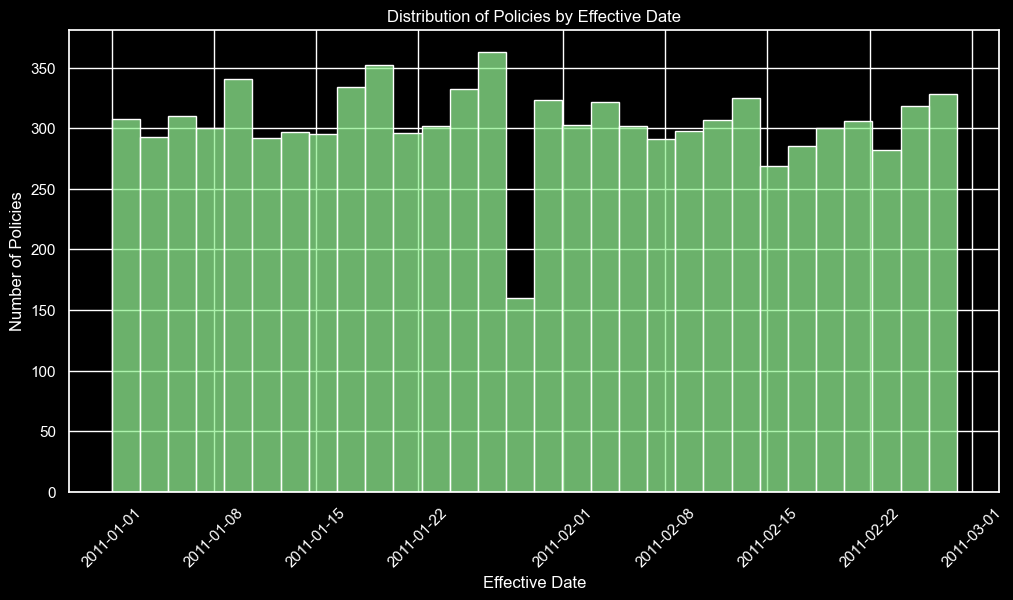

In [42]:
## 4. Plot time variable

## I converted 'Effective To Date' to datetime
categoricals['Effective To Date'] = pd.to_datetime(categoricals['Effective To Date'])

## Plotting
plt.figure(figsize=(12, 6))
sns.histplot(categoricals['Effective To Date'], bins=30, kde=False, color='lightgreen')
plt.title('Distribution of Policies by Effective Date')
plt.xlabel('Effective Date')
plt.ylabel('Number of Policies')
plt.xticks(rotation=45)
plt.show()

### Conclussion:
* Uniform Distribution: The consistent distribution implies that new policies are being introduced steadily over the course of these two months, without any noticeable surges or declines.

* Absence of Seasonal Patterns: Within this two-month timeframe, there's no apparent inclination towards specific seasons or times for starting policies.

* Limitations of Data Collection: The available data spans from the beginning of 2011, restricting any analysis of temporal trends or seasonal effects to this timeframe. It remains uncertain whether this pattern remains consistent across multiple years or varies during different times of the year.